___
## EXERCICE FINAL
___

### 1 – Introduction

Cet exercice a pour objectif de vous amener à traiter des données issues d’une expérience en Sciences Cognitives à l’aide d’un script Python. 

Cette expérience cherche à voir s’il existe un biais lié au genre dans notre perception du corps humain. Pour résumer, nous allons chercher à voir si les femmes ont tendance à juger les corps féminins plus gros que les corps masculins, et nous faisons également l’hypothèse que cette tendance serait uniquement féminine. 

L’idée qui sous-tend ces hypothèses serait que les femmes sont exposées, à travers notamment les medias, à des « role models » très minces et à ce qui est coutume d’appeler la « dictature de la minceur ». Cette pression serait plus forte sur les femmes que sur les hommes. En clair, nous allons voir s’il existe un biais de perception lié au genre qui amènerait plus les femmes à percevoir Beyoncé « grosse » …

### 2 - Psychophysique très rapide

La question de la relation entre stimulus externe et perception est éminemment subjective, et de nature probabiliste. 

Ainsi, lorsqu’il s’agit de répondre à la question « avez-vous perçu un flash ? », à intensité lumineuse égale, deux personnes peuvent ne pas répondre de la même manière : l’une peut détecter le flash, l’autre non, et cette différence de réponse ne sera pas la même selon les intensités du flash. Idem, une même personne peut, pour deux flashes identiques, percevoir dans un cas et pas dans un autre. Toute cette relation entre stimulus et perception est le domaine de la psychophysique. 

Si nous étions des « détecteurs parfaits », nous aurions une réponse perceptive constante dès lors que l’intensité d’un stimulus dépasse ce que l’on appelle le « seuil perceptif ». 

![alt text](img/PES_figure.bmp)

Le Point d’Equivalence Subjectif est le niveau d’intensité du stimulus qui déclenche 50% de détection de la part du sujet.

![alt text](img/PES_figure2.bmp)

Cet exercice a pour but de déterminer les PES chez les participants, homme et femme, lorsqu’ils jugent des silhouettes masculines et féminines, et de les comparer.

On attend les résultats suivants (hypothèses non argumentées :-)

+ Les PES des femmes sont plus bas que ceux des hommes (effet du facteur « genre du participant »)
+ Les silhouettes féminines engendrent un PES plus bas que les silhouettes masculines (effet du facteur « type de silhouette »)
+ L’écart silhouettes féminines / masculines est plus important chez les femmes que chez les hommes (interaction entre facteur « genre du participant » et « type de silhouette »)

### 3- Traitement des données

L'analyse va se dérouler en 5 étapes.

Il est évident que l'on va mettre en pratique, la totalité des outils de la semaine.

Voici un guide pour les étapes.

Les datas se trouve dans le zip **Data_exo_final.zip** sur github.

#### Etape 1: moissonage des données

Conseils:
  * Inspecter bien le zip et ses fichiers.
  * Construire un grand DataFrame avec la totalité des données brutes. Nom du tableau = **data**

Contraintes:
  * On enlève tous le réponses dont le TR (temps de réponses) est supérieurs à 3s.

Guide pour les noms de variables et colonnes:
  * On garde les noms existant dans ls csv
  * Il va falloir ajouter/calcluer les colonnes suivantes:
    * Subject
    * SubjectGender
    * ItemGender
    * ItemSize

Pour les bons:
  * reformater les nom des sujets avec 2 chiffres.

#### Etape 2: calcul des réponses par sujet pour chaque silhouette

Conseils:
  * Construire un DataFrame intermédiaire qui contabilise le nombre de gros/mince pour chaque sujet et silouette.
    Puis la proportion nb_gros/nb_total pour chaque.
    Nom du tableau = **evaluations**






#### Etape3 : Graphe des données individuelles

Balladez vous chez seaborn gallery et affichez quelque chose de malins avec le DataFrame **evaluations**

Par example, pour chaque sujet et silhouette un truc de ce style:
![alt text](img/PES_figure3.bmp)

Contraintes:
  * en 4 lignes SVP.


#### Etape 4: Fit des données individuelles par un modèle pour trouver la courbe psychometrique

C'est le plus dur!!

Nous allons approximer ces données réelles par une courbe psychométrique qui décrit au mieux les observations réelles. Nous allons donc faire un modèle, qui décrira la réponse théorique du sujet pour toutes les silhouettes qu’on pourra créer, hors des 9 que nous lui avons présentées.

Dans les grands lignes on utilse un Modèle Linéaire Général (GLM) avec un regression binomial.
A méditer: https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique

Voici le code pour le modèle d'un sujet et une silouhette:
```python
from statsmodels.formula.api import glm

# ici df c'est le tableau pour un sujet, une solhouette

# on créer une colonne **gros** qui contient 0 ou 1 (notre bonomial)
df['gros'] = (df['Evaluation']=='gros').astype(int)

# voici le model
model = glm('gros~ItemSize', df, family=sm.families.Binomial())
model_result = model.fit()
print(model_result.summary())


# Ensuite on prédit toutes les valeurs entre 0 et 10 par pas de 0.01
x_model = pd.Series(np.arange(0,10,0.01), name='ItemSize')
y_model = model_result.predict(x)

# on peut afficher la courbe en rouge de prediction comme ici
ax.plot(x_model, y_model, color='red')

```

![alt text](img/PES_figure4.bmp)


#### Etape 5 :  déterminer le PES a partir de la courbe psychometrique

Le PES est le « x_model » qui correspond à un « y_model » de 0.5. (50% de réponses « mince »). Nous allons donc tâcher de déterminer ce x_model.
Dans un premier temps, essayez d’en faire une lecture sur le graphe p.
Ensuite, nous allons déterminer le x_model qui amène la réponse la plus proche possible de 0.5. Ce ne sera pas 0.5 précisément, mais, pour ne pas trop compliquer les choses, nous nous contenterons de cette approximation.

A faire:
  * utilisez la fonction argmin pour chercher le point y_model le plus proche de 0.5 : Y_model_proche_de_0.5
  * pour ca, vous aurez besoin de la valeur absolue de la différence à 0.5
  * le x_model qui correspond à cet y_model_proche_de_0.5 : C’est le PES !
    (vérifiez qu’il correspond bien à l’estimation graphique que vous en avez faite)

Contrainte:
  * Mettre toutes les **pes** dans un DataFrame **all_pes **
  * Bien organiser ce tableau.
 

#### Etape 6 : analyse de groupe

A partir du tableau **all_pes**:

  * Faire la moyenne des PES en fonction du genre des participants. Représenter graphiquement ce résultat.
  * Faire la moyenne des PES en fonction du type de silhouette. Représenter graphiquement ce résultat.
  * Faire la moyenne des PES en fonction du type de silhouette et du genre du participant. Représenter graphiquement ce résultat.
  * Faire un model a partir du dernier  résultats.




# Etape 1: lire les fichiers

  1. On extrait le zip la où il est. Soit à la main. Soit mieux sous python.
  2. On parcours l'arborescence avec glob
  3. On lit avec pandas.read_csv
  4. On empile dans une liste
  5. On concat le tout.

In [63]:
import zipfile
zipname = '../data/Data_exo_final.zip'
f = zipfile.ZipFile(zipname)
f.extractall('.')

In [65]:
import pandas as pd
import numpy as np
import glob
import re

data_path = './Data_exo_final/'
all_data = []
for subject_gender in ['F', 'H']:
    pattern = data_path+'*Sujet*'+subject_gender
    dirname_per_subject = glob.glob(pattern)
    for dirname in dirname_per_subject:
        subject = re.findall('.(\d+).', dirname)[0]
        subject = '{:02d}{}'.format(int(subject), subject_gender)
        #print('*'*5)
        #print(subject)
        filenames_per_subject = glob.glob(dirname+'/*.csv')
        for filename in filenames_per_subject:
            #print(filename)
            df = pd.read_csv(filename, sep=';', header=0)
            df['Subject'] = subject
            df['SubjectGender'] = subject_gender
            all_data.append(df)
data = pd.concat(all_data)


print(data.head(12))



    Numero Item Evaluation     RT Subject SubjectGender
0        1   W2      mince  2.545     04F             F
1        2   W9       gros  1.563     04F             F
2        3   M6       gros  1.656     04F             F
3        4   M5       gros  1.359     04F             F
4        5   W1      mince  1.366     04F             F
5        6   W5       gros  1.501     04F             F
6        7   M8       gros  1.403     04F             F
7        8   W8       gros  1.267     04F             F
8        9   M4       gros  1.250     04F             F
9       10   W6       gros  1.251     04F             F
10      11   M2      mince  2.063     04F             F
11      12   W3      mince  1.406     04F             F


In [66]:
# On ne garde que les RT<3.0s

# ce qe l'on perd
print('on enleve', data[data['RT']>=3.].shape[0])

# ce qu'on garde
data = data[data['RT']<3.]



on enleve 25


In [67]:
#Sous excel pour la posetrité
data.to_excel('data_subject.xlsx')

# Etape 2: calcul des reponses par Sujet/Item

In [68]:
df = data.groupby(['Subject', 'Item', 'Evaluation'])['Subject'].count()
df = df.unstack('Evaluation')
df.head()

Evaluation    gros  mince
Subject Item             
01F     M1     NaN    8.0
        M2     NaN    9.0
        M3     NaN    9.0
        M4     1.0    7.0
        M5    10.0    NaN

In [69]:
#Petite ruse pour mettre des 0 au lieu des nan
df[df.isnull()] = 0
df.head()

Evaluation    gros  mince
Subject Item             
01F     M1     0.0    8.0
        M2     0.0    9.0
        M3     0.0    9.0
        M4     1.0    7.0
        M5    10.0    0.0

In [78]:
#On ajjoute une colonne proportion
df['prop'] = df['gros']/(df['mince']+df['gros'])
df.head(20)


Evaluation    gros  mince      prop
Subject Item                       
01F     M1     0.0    8.0  0.000000
        M2     0.0    9.0  0.000000
        M3     0.0    9.0  0.000000
        M4     1.0    7.0  0.125000
        M5    10.0    0.0  1.000000
        M6    10.0    0.0  1.000000
        M7    10.0    0.0  1.000000
        M8     9.0    0.0  1.000000
        M9    10.0    0.0  1.000000
        W1     0.0    7.0  0.000000
        W2     0.0   10.0  0.000000
        W3     0.0   10.0  0.000000
        W4     1.0    8.0  0.111111
        W5     8.0    0.0  1.000000
        W6    10.0    0.0  1.000000
        W7     8.0    0.0  1.000000
        W8    10.0    0.0  1.000000
        W9    10.0    0.0  1.000000
02F     M1     0.0   10.0  0.000000
        M2     0.0    9.0  0.000000

In [79]:
#On case les index et on creer une colonne ItemSize

df2 = df.reset_index()

def create_ItemGender(text):
    return text[0]

def create_ItemSize(text):
    return float(text[1])

df2['ItemGender'] = df2['Item'].apply(create_ItemGender)
df2['ItemSize'] = df2['Item'].apply(create_ItemSize)
df2.head(25)

data['ItemGender'] = data['Item'].apply(create_ItemGender)
data['ItemSize'] = data['Item'].apply(create_ItemSize)


# Etape 3: Affichage avec seaborn

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

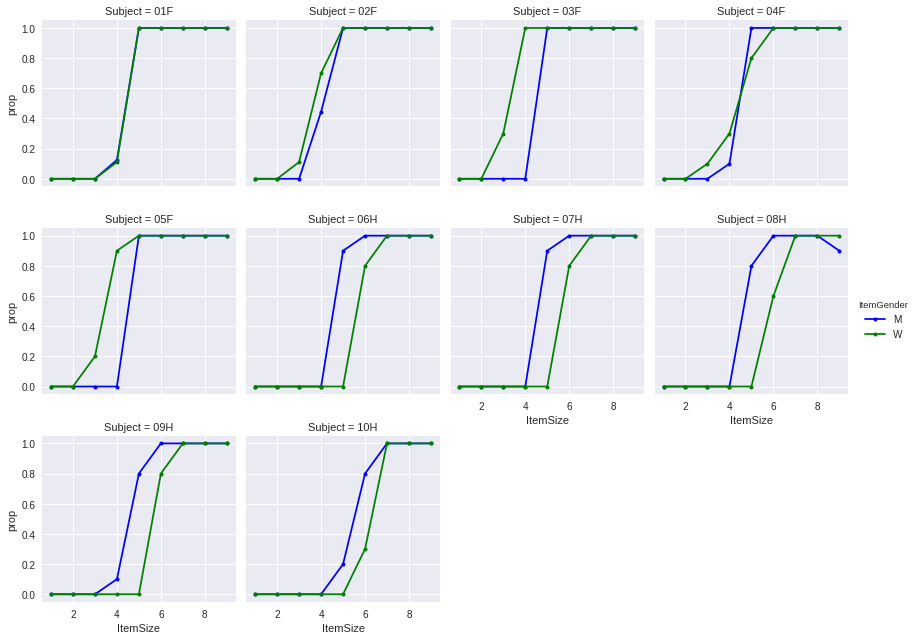

In [81]:
colors_item_gender = {'M':'blue', 'W':'green'}
grid = sns.FacetGrid(df2, col="Subject", hue="ItemGender", col_wrap=4, palette=colors_item_gender)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=4)
grid.add_legend()

# Etape 4: fit des data pour trouver le PES

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

subjects = df2['Subject'].unique()
item_genders = df2['ItemGender'].unique()

#subjects = subjects[:1]

all_fit = {}
for subject in subjects:
    for item_gender in item_genders:
        print(subject, item_gender)
        subdata = data[(data['Subject']==subject) & (data['ItemGender']==item_gender)].copy()
        #subdata['mince'] = (subdata['Evaluation']=='mince').astype(int)
        subdata['gros'] = (subdata['Evaluation']=='gros').astype(int)
        #print(subdata)
        #binom = subdata[['gros', 'mince']]
        #binom = subdata['gros']
        #print(binom)
        #model = sm.GLM(binom, subdata['ItemSize'], family=sm.families.Binomial())
        #model = sm.Logit(binom, subdata['ItemSize'])
        try:
            model = glm('gros~ItemSize', subdata, family=sm.families.Binomial())
            model_result = model.fit()
            #print(model_result.summary())

            all_fit[(subject, item_gender)] = model_result
        except:
            pass



01F M
01F W
02F M
02F W
03F M
03F W
04F M
04F W
05F M
05F W
06H M
06H W
07H M
07H W
08H M
08H W
09H M
09H W
10H M
10H W


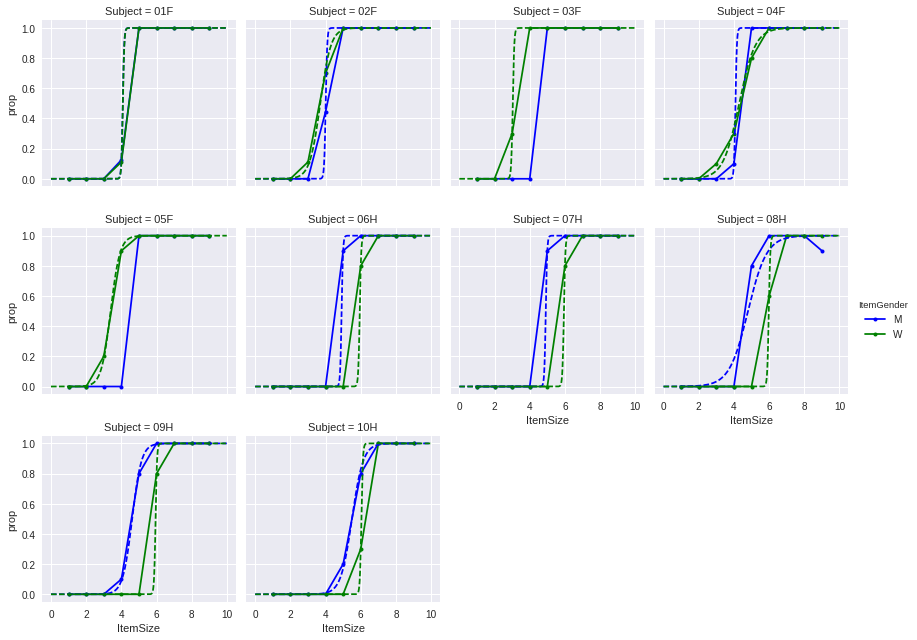

In [83]:
# On affiche dans le meme graph que précédement
grid = sns.FacetGrid(df2, col="Subject", hue="ItemGender", col_wrap=4, palette=colors_item_gender)
grid.map(plt.plot, "ItemSize", "prop", marker="o", ms=4)
grid.add_legend()

x = pd.Series(np.arange(0,10,0.01), name='ItemSize')


for i, subject in enumerate(subjects):
    ax = grid.axes.flatten()[i]
    for item_gender in item_genders:
        if (subject, item_gender) not in all_fit:
            continue
        
        model_result = all_fit[(subject, item_gender)]
        #print(model_result.params)
        y = model_result.predict(x)
        ax.plot(x, y, ls='--', color=colors_item_gender[item_gender])



# Etape 5 :  déterminer le PES a partir de la courbe psychometrique

In [107]:
# on trouve la PES pour chaque subjet/ItemGender
# valeur de Item size quand prop est proche de 0.5

index = pd.MultiIndex.from_product([subjects, item_genders], names=['Subject', 'ItemGender'])
all_pes = pd.DataFrame(index=index, columns=['pes'], dtype='float64')


x = pd.Series(np.arange(0,10,0.01), name='ItemSize')

for subject in subjects:
    for item_gender in item_genders:
        if (subject, item_gender) not in all_fit:
            continue
        
        model = all_fit[(subject, item_gender)]
        y = model.predict(x)
        ind = np.argmin(np.abs(y-.5))
        all_pes.loc[(subject, item_gender), 'pes'] = x[ind]

#all_pes = all_pes.unstack('ItemGender')
all_pes


pes
Subject ItemGender      
01F     M           4.08
        W           4.08
02F     M           4.01
        W           3.70
03F     M            NaN
        W           3.04
04F     M           4.09
        W           4.30
05F     M            NaN
        W           3.39
06H     M           4.91
        W           5.94
07H     M           4.91
        W           5.94
08H     M           4.80
        W           5.98
09H     M           4.61
        W           5.94
10H     M           5.50
        W           6.04

# Etape 6 : analyse de groupe



In [108]:
# Petite ruse pour récupérer le genre sans soucis
all_pes = all_pes.reset_index()
all_pes['SubjectGender'] = all_pes['Subject'].apply(lambda s: s[-1])
all_pes

,Subject,ItemGender,pes,SubjectGender
0,01F,M,4.08,F
1,01F,W,4.08,F
2,02F,M,4.01,F
3,02F,W,3.70,F
4,03F,M,NaN,F
5,03F,W,3.04,F
6,04F,M,4.09,F
7,04F,W,4.30,F
8,05F,M,NaN,F
9,05F,W,3.39,F


  SubjectGender      pes
0             F  3.83625
1             H  5.45700


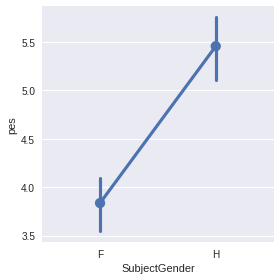

In [142]:
# par SubjectGender
m1 = all_pes.groupby(['SubjectGender'])['pes'].mean()
print(m1)
sns.factorplot(data=all_pes, x='SubjectGender', 
               pallette=colors_item_gender, y='pes')

ItemGender
M    4.61375
W    4.83500
Name: pes, dtype: float64


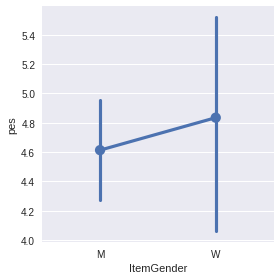

In [144]:
# par ItemGender
m2 = all_pes.groupby(['ItemGender'])['pes'].mean()
print(m2)
sns.factorplot(data=all_pes, x='ItemGender', 
               pallette=colors_item_gender, y='pes')

In [145]:
# Par SubjectGender/ItemGender
m3 = all_pes.groupby(['SubjectGender', 'ItemGender'])['pes'].mean()
m3 = m3.reset_index()
m3

,SubjectGender,ItemGender,pes
0,F,M,4.060
1,F,W,3.702
2,H,M,4.946
3,H,W,5.968


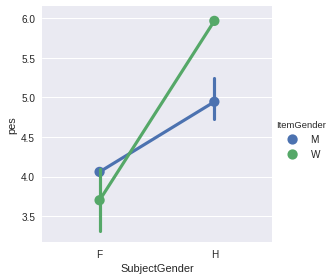

In [146]:
#Afficahge 1
sns.factorplot(data=all_pes, x='SubjectGender', hue='ItemGender',
               pallette=colors_item_gender, y='pes')

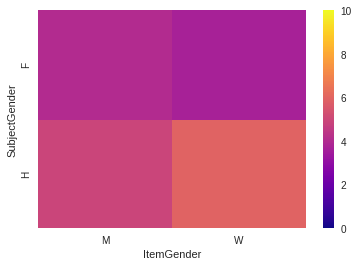

In [147]:
# Affichage 2
m3bis = m3.set_index(['SubjectGender', 'ItemGender']).unstack('ItemGender')
m3bis.columns = m3bis.columns.levels[1]
m3bis
sns.heatmap(m3bis, vmin=0., vmax=10.,cmap='plasma')

In [149]:
#Petite anova vite fait
# Attention c'est un model mixte car chaque sujet fait plusieur mesure.
from statsmodels.formula.api import mixedlm

#on enleve les nan
all_pes = all_pes[all_pes['pes'].notnull()]

model = mixedlm('pes~SubjectGender*ItemGender', all_pes, groups='Subject') 
results = model.fit()
print(results.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         pes    
No. Observations:         18              Method:                     REML   
No. Groups:               10              Scale:                      0.0489 
Min. group size:          1               Likelihood:                 -6.7720
Max. group size:          2               Converged:                  Yes    
Mean group size:          1.8                                                
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           3.865    0.221 17.519 0.000  3.433  4.298
SubjectGender[T.H]                  1.081    0.270  3.997 0.000  0.551  1.611
ItemGender[T.W]                    -0.163    0.209 -0.780 0.435 -0.573  0.247
Subjec